 /Table	of	Contents:-
 /Getting	Started
 /Gathering	Financial	Data
 /Preprocessing	and	Analyzing	Data
 /Building	a	Machine	Learning	Model
 /Implementing	a	Dynamic	Pricing	Strategy
 /Conclusion

## 1.Getting	Started
 Before	we	dive	into	building	dynamic	pricing	models,	let’s	make	sure	we	have	all	the	necessary	libraries	installed.	Run	the	following
 command	to	install	the	yfinance	library:

## 2.Gathering	Financial	Data
 To	build	our	dynamic	pricing	model,	we	need	historical	financial	data	for	the	asset	we	want	to	price.	We	will	use	the	yfinance	library	to
 download	the	data	directly	from	Yahoo	Finance.

In [13]:
import yfinance as yf
#Define the asset symbol
asset_symbol = "CIPLA.NS"
#Download the historical data
data = yf.download(asset_symbol,start="2010-01-01",end="2024-04-15")

[*********************100%***********************]  1 of 1 completed


In [14]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,338.000000,339.500000,336.000000,337.549988,313.998352,635013
2010-01-05,338.549988,342.399994,330.500000,331.500000,308.370514,1664976
2010-01-06,332.000000,348.899994,330.350006,344.899994,320.835602,3580916
2010-01-07,346.000000,350.399994,340.500000,342.049988,318.184418,1555841
2010-01-08,345.000000,346.500000,340.200012,341.100006,317.300720,913410
...,...,...,...,...,...,...
2024-04-05,1439.000000,1474.000000,1437.500000,1449.400024,1449.400024,1211684
2024-04-08,1457.150024,1472.849976,1449.400024,1462.449951,1462.449951,1039235
2024-04-09,1467.750000,1470.000000,1447.099976,1450.300049,1450.300049,1225255


## 3.	Preprocessing	and	Analyzing	Data
 Before	we	can	train	our	machine	learning	model,	we	need	to	preprocess	the	data	and	extract	relevant	features.	Let’s	start	by	visualizing
 the	historical	prices	of	the	asset.

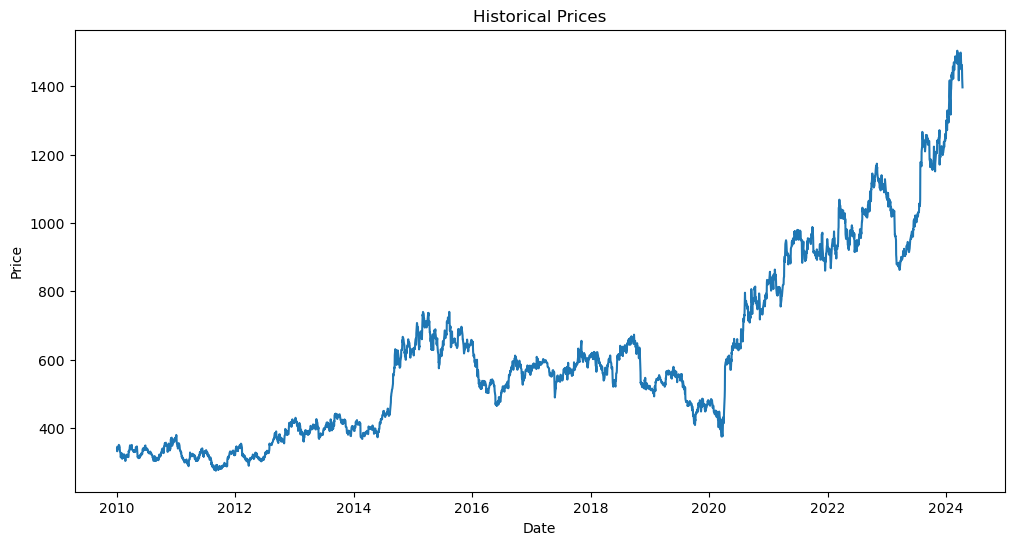

In [3]:
import matplotlib.pyplot as plt
#Plot the historical prices
plt.figure(figsize=(12,6))
plt.plot(data["Close"])
plt.title("Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

 Next,	let’s	calculate	some	basic	statistics	of	the	asset’s	returns.	Returns	are	often	used	in	financial	analysis	as	they	provide	insights	into	the	asset’s
 performance.

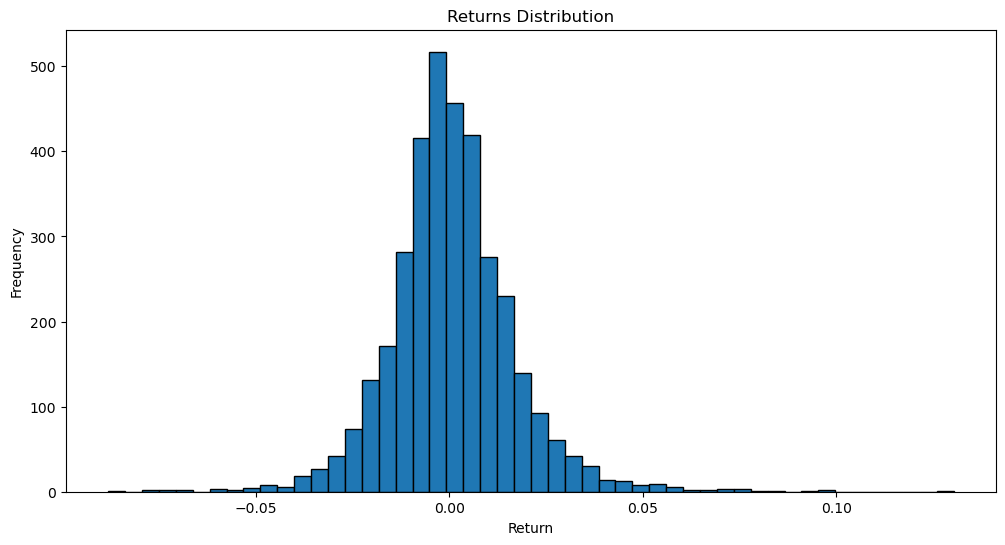

In [4]:
#Calculate the daily returns
returns = data["Close"].pct_change()
#Plot the returns distribution
plt.figure(figsize=(12,6))
plt.hist(returns.dropna(),bins=50,edgecolor="black")
plt.title("Returns Distribution")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()

 In	the	code	above,	we	calculate	the	daily	returns	of	the	asset	by	taking	the	percentage	change	in	the	closing	prices.	We	then	plot	the
 distribution	of	returns	using	a	histogram.

## 4.	Building	a	Machine	Learning	Model
 To	predict	future	asset	prices,	we	will	train	a	machine	learning	model	using	the	historical	data.	In	this	tutorial,	we	will	use	a	simple	linear
 regression	model	as	an	example.

In [5]:
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
train_data,test_data = train_test_split(data,test_size=0.2,shuffle=False)

 In	the	code	above,	we	use	the	train_test_split	function	from	sklearn.model_selection	to	split	the	data	into	training	and	testing	sets.	We	set
 the	test_size	parameter	to	0.2,	indicating	that	we	want	to	allocate	20%	of	the	data	for	testing.

In [6]:
##Next,let’s preprocess the data by scaling the features and target variable.
from sklearn.preprocessing import MinMaxScaler
#Scale the features and target variable
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data["Close"].values.reshape(-1,1))
test_data_scaled = scaler.transform(test_data["Close"].values.reshape(-1,1))

 In	the	code	above,	we	use	the	MinMaxScaler	from	sklearn.preprocessing	to	scale	the	closing	prices	of	the	asset.	Scaling	the	data
 ensures	that	all	features	have	a	similar	range,	which	can	improve	the	performance	of	our	machine	learning	model.

In [7]:
##Now,let’s train our linear regression model using the scaled training data.
from sklearn.linear_model import LinearRegression
#Train a linear regression model
model = LinearRegression()
model.fit(train_data_scaled[:-1],train_data_scaled[1:])

LinearRegression()

 In	the	code	above,	we	create	an	instance	of	the	LinearRegression	class	from	sklearn.linear_model	and	fit	the	model	to	the	training	data.
 We	use	the	closing	prices	of	the	asset	at	time	t	as	the	input	feature	and	the	closing	prices	at	time	t+1	as	the	target	variable.

In [8]:
#Now that we have trained our model, let’s evaluate its performance on the testing data.
# Make predictions on the testing data
predictions_scaled = model.predict(test_data_scaled[:-1])
#Inverse scale the predictions
predictions = scaler.inverse_transform(predictions_scaled)

 In	the	code	above,	we	use	the	trained	model	to	make	predictions	on	the	scaled	testing	data.	We	then	inverse	scale	the	predictions	to
 obtain	the	actual	asset	prices.

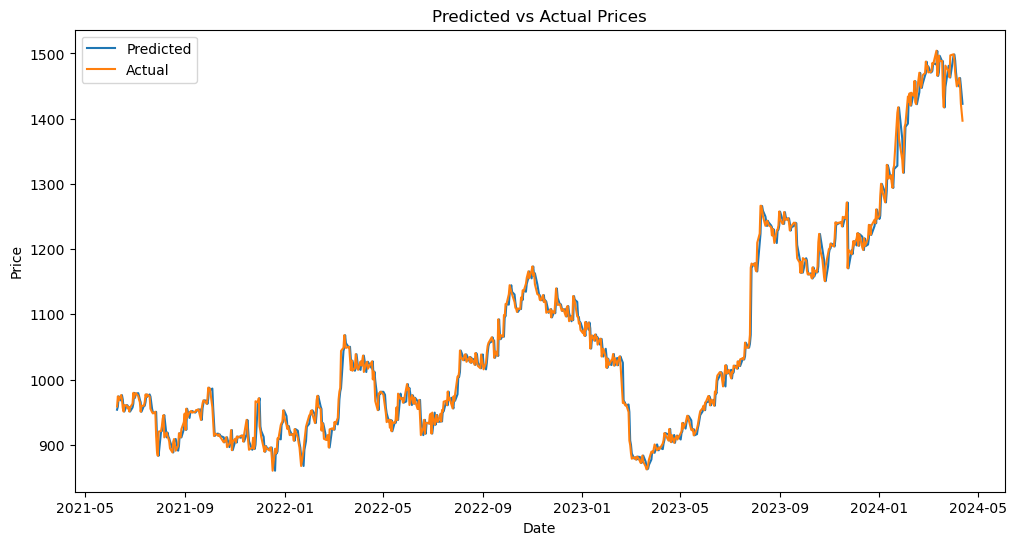

In [9]:
##Let’s visualize the predicted prices and compare them to the actual prices.
#Plot the predicted and actual prices
plt.figure(figsize=(12,6))
plt.plot(test_data.index[1:],predictions,label="Predicted")
plt.plot(test_data.index[1:],test_data["Close"][1:],label="Actual")
plt.title("Predicted vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In	the	code	above,	we	use	matplotlib	to	plot	the	predicted	prices	and	actual	prices	on	the	testing	data.
 Now	that	we	have	trained	and	evaluated	our	machine	learning	model,	let’s	move	on	to	implementing	a	dynamic	pricing	strategy.

## 5.	Implementing	a	Dynamic	Pricing	Strategy
 A	dynamic	pricing	strategy	adjusts	prices	based	on	market	conditions	to	maximize	profitability.	In	our	case,	we	will	use	the	predictions
 from	our	machine	learning	model	to	dynamically	adjust	the	prices	of	the	asset.


 Let’s	define	a	simple	dynamic	pricing	strategy	that	adjusts	the	prices	based	on	the	predicted	returns.	If	the	predicted	return	is	positive,	we
 will	increase	the	price	by	a	certain	percentage.	If	the	predicted	return	is	negative,	we	will	decrease	the	price	by	the	same	percentage.

In [11]:
def dynamic_pricing_strategy(predictions, current_price, increase_percentage, decrease_percentage):
    predicted_return = (predictions - current_price) / current_price
    if predicted_return > 0:
        new_price = current_price * (1 + increase_percentage)
    else:
        new_price = current_price * (1 - decrease_percentage)
    return new_price


 In	the	code	above,	we	define	the	dynamic_pricing_strategy	function	that	takes	the	predictions,	current	price,	increase	percentage	and
 decrease	percentage	as	inputs.	We	calculate	the	predicted	return	as	the	difference	between	the	predictions	and	the	current	price	divided
 by	the	current	price.	If	the	predicted	return	is	positive,	we	increase	the	price	by	the	specified	increase	percentage.	If	the	predicted	return
 is	negative,	we	decrease	the	price	by	the	specified	decrease	percentage.

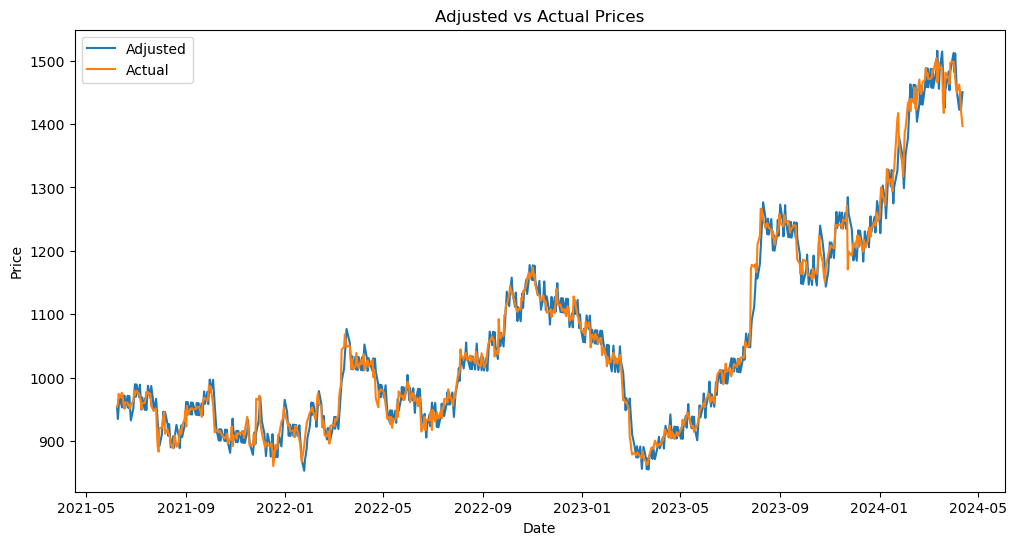

In [12]:
import matplotlib.pyplot as plt

# Apply the dynamic pricing strategy
adjusted_prices = [test_data["Close"].iloc[0]]
for i in range(len(predictions)):
    adjusted_price = dynamic_pricing_strategy(predictions[i], adjusted_prices[-1], 0.02, 0.02)
    adjusted_prices.append(adjusted_price)

# Plot the adjusted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, adjusted_prices, label="Adjusted")
plt.plot(test_data.index, test_data["Close"], label="Actual")
plt.title("Adjusted vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In	the	code	above,	we	iterate	through	the	predictions	and	apply	our	dynamic	pricing	strategy	to	calculate	the	adjusted	prices.	We	then
 plot	the	adjusted	prices	and	actual	prices	on	the	testing	data

We have successfully	built	a	dynamic	pricing	model	for	assets	using	machine	learning	techniques.	By	adapting	the	prices	based	on
 market	conditions,	we	can	make	more	informed	investment	decisions.